In [12]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv("../Data/farms_train.csv", sep=";")
# Remplacer les virgules par des points dans tout le DataFrame
df = df.replace({',': '.'}, regex=True)

# Convertir les colonnes appropriées en numérique si nécessaire
df = df.apply(pd.to_numeric, errors='ignore')

# Afficher les premières lignes pour vérifier le contenu
print(df.head())
print(df.info())


   DIFF     R2     R7      R8     R17     R22     R32
0     0  0.705  0.290  0.1334  0.0481  0.5258  0.2941
1     1  0.801  0.213  0.1282  0.0186  2.1411  0.3005
2     1  0.591  0.429  0.2999  0.0800  0.5957  0.4126
3     0  0.373  0.346  1.3704  0.0812  0.3430  0.2265
4     0  0.000  1.417  0.2493  0.0501  0.8728  0.1086
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DIFF    303 non-null    int64  
 1   R2      303 non-null    float64
 2   R7      303 non-null    float64
 3   R8      303 non-null    float64
 4   R17     303 non-null    float64
 5   R22     303 non-null    float64
 6   R32     303 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.7 KB
None


C:\Users\malco\AppData\Local\Temp\ipykernel_24912\3761542423.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


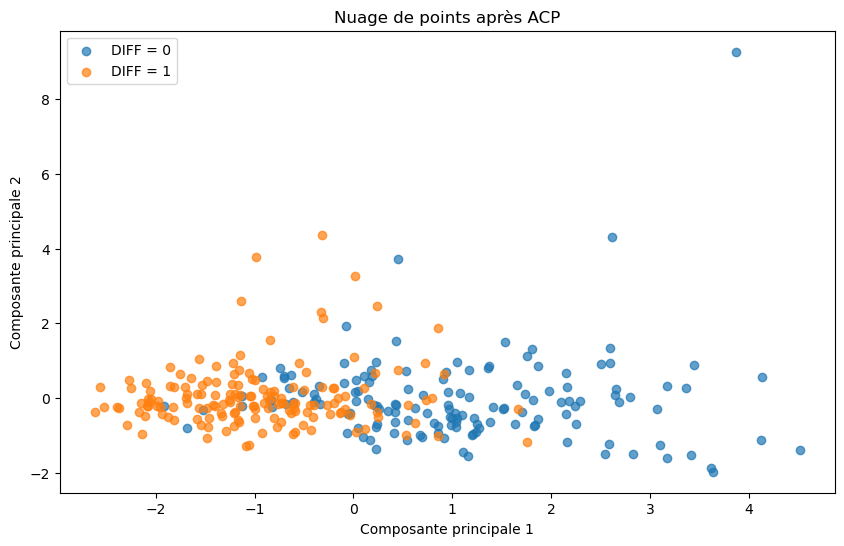

Composantes principales (directions) :
[[-0.57415252  0.54414341 -0.00870526  0.29882629  0.09959405 -0.52437099]
 [ 0.18129753 -0.28984566  0.15176552  0.34712263  0.8480378  -0.14291849]]

Inertie expliquée par chaque composante :
[0.36262549 0.17280056]

Inertie totale expliquée par les deux premières composantes :
0.535426046762949
                    R2        R7        R8       R17       R22       R32
Composante 1 -0.574153  0.544143 -0.008705  0.298826  0.099594 -0.524371
Composante 2  0.181298 -0.289846  0.151766  0.347123  0.848038 -0.142918


In [84]:
# Séparer les caractéristiques et la variable cible
X = df.drop("DIFF", axis=1)
y = df["DIFF"]

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tracer le nuage de points
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"DIFF = {label}", alpha=0.7)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Nuage de points après ACP")
plt.legend()
plt.show()

# Afficher les composantes principales et l'inertie expliquée
print("Composantes principales (directions) :")
print(pca.components_)

print("\nInertie expliquée par chaque composante :")
print(pca.explained_variance_ratio_)

print("\nInertie totale expliquée par les deux premières composantes :")
print(np.sum(pca.explained_variance_ratio_))

import pandas as pd

# Créer un DataFrame pour représenter les contributions
df_pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=[f"Composante {i+1}" for i in range(pca.n_components_)])
print(df_pca_components)


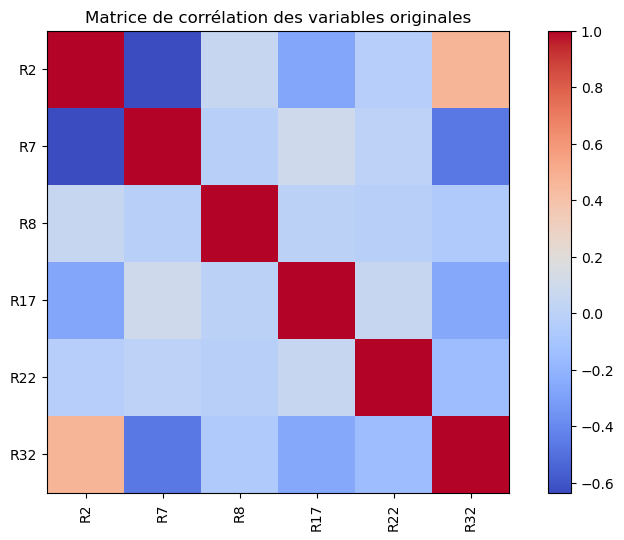

In [22]:
# Afficher la matrice de corrélation
correlation_matrix = X.corr()
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Matrice de corrélation des variables originales")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


Erreur quadratique moyenne (MSE) : 0.18658885163966205
Score R² : 0.2518350032853637


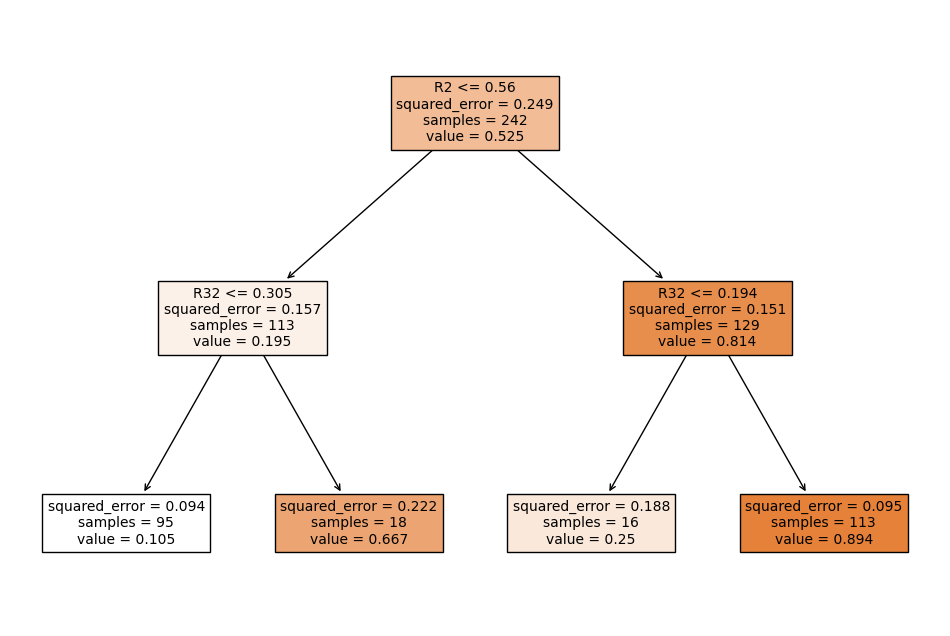

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

data = df

# Séparer les caractéristiques (X) et la cible (y)
X = data[['R2', 'R7', 'R8', 'R17', 'R22', 'R32']]  # Les colonnes des caractéristiques
y = data['DIFF']  # La colonne cible (DIFF)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner l'arbre de décision
model = DecisionTreeRegressor(random_state=42, max_depth=2, min_samples_split=10)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Score R² : {r2}")

# Afficher l'arbre de décision
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.show()



Précision du modèle avec seuil  0.39  :  0.8351648351648352


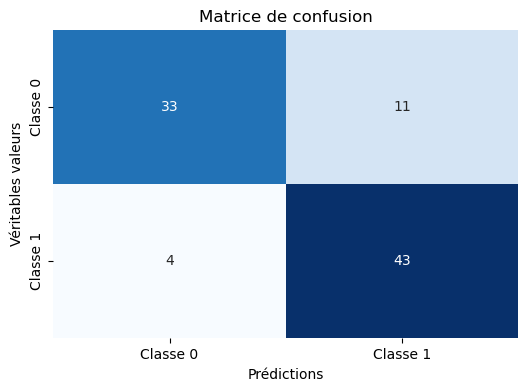

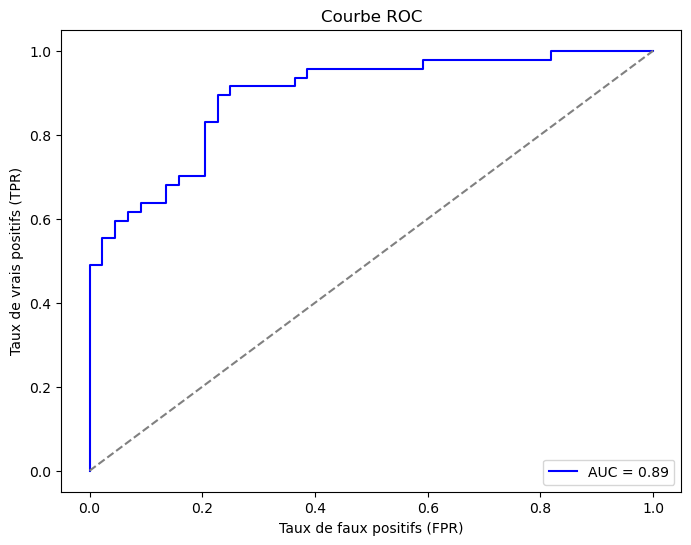

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données (assumer que 'diff' est la variable cible binaire)
y = df['DIFF']
X = df.drop('DIFF', axis=1)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Faire des prédictions de probabilité
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive (1)

# Choisir un seuil personnalisé, par exemple 0.39
seuil = 0.39
y_pred_custom = (y_prob >= seuil).astype(int)

# Évaluer le modèle avec le seuil personnalisé
accuracy = accuracy_score(y_test, y_pred_custom)
print("Précision du modèle avec seuil ", seuil, " : ", accuracy)

# Matrice de confusion avec le seuil personnalisé
cm = confusion_matrix(y_test, y_pred_custom)

# Créer une heatmap pour la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'], cbar=False)

# Ajouter des labels et un titre
plt.xlabel('Prédictions')
plt.ylabel('Véritables valeurs')
plt.title('Matrice de confusion')

# Afficher le graphique
plt.show()

# Calcul de la courbe ROC et de l'aire sous la courbe (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Ligne diagonale
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_custom)




In [54]:
from sklearn.metrics import f1_score

# Tester différents seuils
seuils = [i / 100 for i in range(1, 100)]
best_f1 = 0
best_seuil = 0

for seuil in seuils:
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe "1"
    y_pred = (y_pred_prob >= seuil).astype(int)
    score_f1 = f1_score(y_test, y_pred)
    if score_f1 > best_f1:
        best_f1 = score_f1
        best_seuil = seuil

print(f"Meilleur seuil : {best_seuil} avec un F1-score de {best_f1}")


Meilleur seuil : 0.39 avec un F1-score de 0.8285714285714286


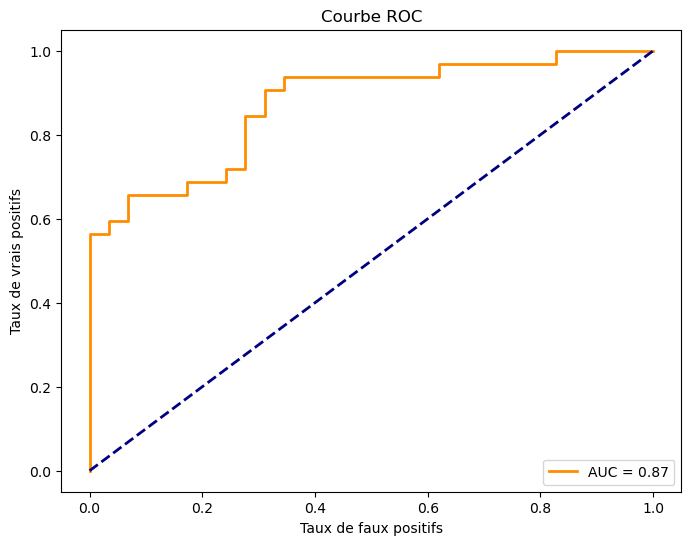

Seuils: [       inf 0.92910493 0.76363419 0.76164494 0.75346032 0.74326197
 0.71991257 0.69075894 0.6821927  0.63641198 0.61386875 0.58656153
 0.54508445 0.4844984  0.41596406 0.38695249 0.38632939 0.18676774
 0.18010663 0.10834057 0.09451902 0.01665145]
fpr :  [0.         0.         0.         0.03448276 0.03448276 0.06896552
 0.06896552 0.17241379 0.17241379 0.24137931 0.24137931 0.27586207
 0.27586207 0.31034483 0.31034483 0.34482759 0.34482759 0.62068966
 0.62068966 0.82758621 0.82758621 1.        ]
tpr [0.      0.03125 0.5625  0.5625  0.59375 0.59375 0.65625 0.65625 0.6875
 0.6875  0.71875 0.71875 0.84375 0.84375 0.90625 0.90625 0.9375  0.9375
 0.96875 0.96875 1.      1.     ]


In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer les probabilités
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Afficher les seuils et trouver celui qui maximise la performance souhaitée
print("Seuils:", thresholds)
print("fpr : ", fpr)
print("tpr", tpr)


In [62]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report

# Calcul des prédictions pour chaque seuil
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Affichage des résultats pour chaque seuil
for seuil in np.unique(seuils):
    y_pred = (y_pred_prob >= seuil).astype(int)
    
    # Calculer les métriques pour ce seuil
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Affichage des métriques principales
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    print(f"\nSeuil = {seuil:.4f}")
    print(f"  Précision: {precision:.4f}")
    print(f"  Rappel: {recall:.4f}")
    print(f"  F1-score: {f1_score:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")


C:\Users\malco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\malco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\malco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Seuil = 0.0100
  Précision: 0.5246
  Rappel: 1.0000
  F1-score: 0.6882
  Accuracy: 0.5246

Seuil = 0.0200
  Précision: 0.5333
  Rappel: 1.0000
  F1-score: 0.6957
  Accuracy: 0.5410

Seuil = 0.0300
  Précision: 0.5424
  Rappel: 1.0000
  F1-score: 0.7033
  Accuracy: 0.5574

Seuil = 0.0400
  Précision: 0.5517
  Rappel: 1.0000
  F1-score: 0.7111
  Accuracy: 0.5738

Seuil = 0.0500
  Précision: 0.5517
  Rappel: 1.0000
  F1-score: 0.7111
  Accuracy: 0.5738

Seuil = 0.0600
  Précision: 0.5517
  Rappel: 1.0000
  F1-score: 0.7111
  Accuracy: 0.5738

Seuil = 0.0700
  Précision: 0.5517
  Rappel: 1.0000
  F1-score: 0.7111
  Accuracy: 0.5738

Seuil = 0.0800
  Précision: 0.5614
  Rappel: 1.0000
  F1-score: 0.7191
  Accuracy: 0.5902

Seuil = 0.0900
  Précision: 0.5714
  Rappel: 1.0000
  F1-score: 0.7273
  Accuracy: 0.6066

Seuil = 0.1000
  Précision: 0.5636
  Rappel: 0.9688
  F1-score: 0.7126
  Accuracy: 0.5902

Seuil = 0.1100
  Précision: 0.5741
  Rappel: 0.9688
  F1-score: 0.7209
  Accuracy: 0.6066

C:\Users\malco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\malco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\malco\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\malco\anaconda3\Lib\site-packag

In [78]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Charger les données d'entraînement
data_train = pd.read_csv("../Data/farms_train.csv", sep=";")
# Remplacer les virgules par des points dans tout le DataFrame
data_train = data_train.replace({',': '.'}, regex=True)

# Convertir les colonnes appropriées en numérique si nécessaire
data_train = data_train.apply(pd.to_numeric, errors='ignore')

# Séparer les caractéristiques (X) et la variable cible (y) pour l'entraînement
X_train = data_train.drop('DIFF', axis=1)  # Assurez-vous que 'DIFF' est la variable cible
y_train = data_train['DIFF']

# Créer et entraîner un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Charger les données de test
data_test = pd.read_csv("../Data/farms_test.csv", sep=";")

# Remplacer les virgules par des points dans tout le DataFrame
data_test = data_test.replace({',': '.'}, regex=True)

# Convertir les colonnes appropriées en numérique si nécessaire
data_test = data_test.apply(pd.to_numeric, errors='ignore')


# Séparer les caractéristiques du jeu de test
X_test = data_test  # Assurez-vous qu'il n'y a pas de colonne 'DIFF' dans le test, sinon retirez-la

# Faire des prédictions de probabilité sur les données de test
y_prob_test = model.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive (1)

# Appliquer le seuil de 0.39
seuil = 0.39
y_pred_test = (y_prob_test >= seuil).astype(int)

# Créer un DataFrame avec les données de test et les prédictions
df_predictions = data_test.copy()  # Copier les données de test
df_predictions['Prediction'] = y_pred_test  # Ajouter la prédiction comme nouvelle colonne

# Sauvegarder ce DataFrame dans un fichier CSV
df_predictions.to_csv('predictions_test.csv', index=False)

print("Fichier 'predictions_test.csv' créé avec succès.")


Fichier 'predictions_test.csv' créé avec succès.


C:\Users\malco\AppData\Local\Temp\ipykernel_24912\3822559186.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_train = data_train.apply(pd.to_numeric, errors='ignore')
C:\Users\malco\AppData\Local\Temp\ipykernel_24912\3822559186.py:27: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_test = data_test.apply(pd.to_numeric, errors='ignore')
